In [ ]:
# importing necessary modules and libraries

import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import numpy as np

%matplotlib inline


In [85]:


main_dataset = pd.read_csv("../../datasets/medical-charges.csv")

In [3]:
main_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
import seaborn as sns
import plotly.express as px


In [5]:
main_dataset.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
main_dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
import plotly.io as pio

# Use the default browser renderer
# pio.renderers.default = 'vscode'

In [19]:


fig = px.histogram(main_dataset, x="age", marginal="box", nbins=47, title="Age Distribution")
fig.update_layout(bargap = 0.1)
fig.show()


In [16]:
fig = px.histogram(main_dataset, 
                   x="bmi", 
                   marginal="box", 
                   nbins=47, 
                   title="BMI Distribution",
                   color_discrete_sequence= ['red'])
fig.update_layout(bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(main_dataset, 
                   x="charges", 
                   marginal="box", 
                   nbins=47, 
                   title="Annual Medical Charges",
                   color = "smoker",
                   color_discrete_sequence= ['green', 'grey'])
fig.update_layout(bargap = 0.1)
fig.show()

In [20]:
fig = px.histogram(main_dataset,
                   x = "charges",
                   marginal="box",
                   nbins=47,
                   title="Distribution of Charges according to Gender",
                   color="sex",
                   color_discrete_sequence=["pink", "DodgerBlue"])
fig.update_layout(bargap = 0.1)
fig.show()

In [44]:
subdata = main_dataset.groupby("region")[["charges"]].sum()
type(subdata.index)


pandas.core.indexes.base.Index

In [48]:
'''fig = px.histogram(
    main_dataset, 
    x = "charges",
    color="region",
    color_discrete_sequence=["slateblue", "plum", "powderblue", "lightseagreen"],
    nbins = 47
)'''


fig = px.histogram(
    subdata, 
    x = "charges",
    color=subdata.index,
    color_discrete_sequence=["slateblue", "plum", "powderblue", "lightseagreen"],
    nbins = 4
)
fig.update_layout(bargap = 0.1)
fig.show()

In [63]:
fig = px.bar(subdata, 
             x = subdata.index,
             y="charges",
             color=subdata.index,
             color_discrete_sequence=["slateblue", "plum", "powderblue", "lightseagreen"],
             title = "Comparison of charges by region"
             )

fig.show()

In [50]:
main_dataset.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [54]:
fig = px.histogram(
    main_dataset,
    x = "smoker",
    color = "sex",
    color_discrete_sequence= ["lightpink", "dodgerblue"],
    
)
fig.update_layout(bargap = 0.1)
fig.show()

In [62]:
fig = px.scatter(
    main_dataset,
    x = "age",
    y = "charges",
    color = "sex",
    color_discrete_sequence=["lightpink", "dodgerblue"],
    opacity = 0.7,
    title = "Relation between age and charges",
    hover_data=["bmi", "smoker"]

)

fig.show()

In [67]:
fig = px.scatter(
    main_dataset,
    x = "bmi",
    y = "charges",
    color = "smoker",
    color_discrete_sequence=[ "rosybrown","lightgreen",],
    opacity = 0.7,
    title = "Relation between bmi and medical charges",
    hover_data=["bmi", "smoker"]

)

fig.show()

### Correlation
- The `.corr` method of a pandas dataframe can be used to compute the correlation coefficient between two columns. 

- The correlation coefficient for categorical columns cannot be computed unless the categorical columns ae converted to numerical columns.

- The correlation coefficient is often represented by $ r $.

- When $r$ falls in the range $ (-1, 1) $ but $r \neq 0$, there is a relationship. However, not all the points fall closer to a line.

- The closer $ r $ is to $ 1 $ or $ -1 $, the stronger the relationship and likelihood of points falling on a line.

- Positive coefficients mean that when the value of one variable increases, the value of the other variable also tends to increase. (Indicating an upward slope on a scatter diagram)

- A negative $r $ on the other hand means when the value of one variable increases, the value of the other variable tends to decrease rather. (Indicating a downward slope).

In [68]:
main_dataset.charges.corr(main_dataset.age)

np.float64(0.2990081933306476)

In [ ]:
main_dataset["charges"].corr(main_dataset["bmi"])

np.float64(0.19834096883362878)

In [77]:

smoker_values = {"no": 0, "yes": 1}
smoker_numeric = main_dataset.smoker.map(smoker_values)
main_dataset.charges.corr(smoker_numeric)


np.float64(0.7872514304984782)

In [93]:
test_dataset = main_dataset.copy()
test_dataset.pop("sex")
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = main_dataset.smoker.map(smoker_values)
test_dataset.smoker = smoker_numeric
correlation_table = test_dataset.corr(numeric_only=True)
correlation_table

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

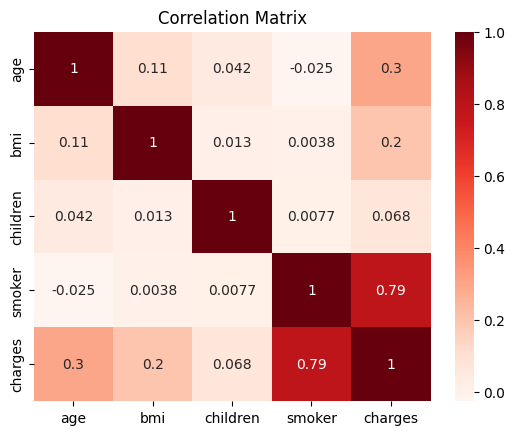

In [94]:
sns.heatmap(correlation_table, cmap='Reds', annot=True)
plt.title('Correlation Matrix')

### Correlation vs Causation Fallacy
- A high correlation cannot be used to interpret a cause-effect relationship between features. 

- Two features X and Y can be correlated if X causes Y or if 
Y causes X. 
Eg. bmi could be the cause of increase in children or increase in children may cause bmi to increase.

- Both could also be caused independently by some other factor Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. 
Eg. both bmi and children are caused by age.

- It's also possible that X are Y simply appear to be correlated because the sample is too small.

- Computers can't differentiate between correlation and causation.

- Decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. 

- Determining cause-effect relationships requires human insight.

## Linear Regression Using a Single Feature
